+ The course is aimed at those with no prior programming experience, and  

+ Each chart uses short and simple code, making seaborn much faster and easier to use than many other data visualization tools (such as Excel, for instance).

In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


In [4]:
raw_train = pd.read_csv('./train.csv')
raw_train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
raw_train.select_dtypes(exclude = 'object').iloc[2].min()

0.0

In [6]:
corr = raw_train.corr(numeric_only=True).abs()[['SalePrice']]
corr_target = corr.SalePrice
type(corr)
for col in corr.index :
    print(corr.loc[col] > 0.4)
print(corr_target)

SalePrice    False
Name: Id, dtype: bool
SalePrice    False
Name: MSSubClass, dtype: bool
SalePrice    False
Name: LotFrontage, dtype: bool
SalePrice    False
Name: LotArea, dtype: bool
SalePrice    True
Name: OverallQual, dtype: bool
SalePrice    False
Name: OverallCond, dtype: bool
SalePrice    True
Name: YearBuilt, dtype: bool
SalePrice    True
Name: YearRemodAdd, dtype: bool
SalePrice    True
Name: MasVnrArea, dtype: bool
SalePrice    False
Name: BsmtFinSF1, dtype: bool
SalePrice    False
Name: BsmtFinSF2, dtype: bool
SalePrice    False
Name: BsmtUnfSF, dtype: bool
SalePrice    True
Name: TotalBsmtSF, dtype: bool
SalePrice    True
Name: 1stFlrSF, dtype: bool
SalePrice    False
Name: 2ndFlrSF, dtype: bool
SalePrice    False
Name: LowQualFinSF, dtype: bool
SalePrice    True
Name: GrLivArea, dtype: bool
SalePrice    False
Name: BsmtFullBath, dtype: bool
SalePrice    False
Name: BsmtHalfBath, dtype: bool
SalePrice    True
Name: FullBath, dtype: bool
SalePrice    False
Name: HalfBath, d

In [7]:
features = corr_target[corr_target>0.6].index.to_list()

In [8]:
features

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'SalePrice']

***LINE CHART*** : Vẽ biểu đồ Line cho SalePrice dựa trên các cột numeric


In [9]:
num_col = raw_train.select_dtypes(exclude = 'object').columns

label : nhãn của figure  
xlabel, ylabel : nhãn của trục

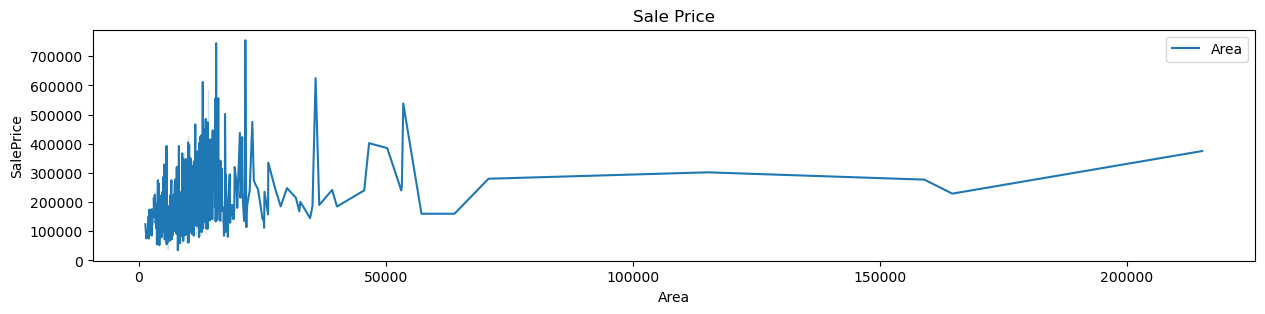

In [10]:
plt.figure(figsize=(15,3))  #theo inch
plt.title("Sale Price")
sns.lineplot(x=raw_train['LotArea'], y = raw_train['SalePrice'], label = 'Area')
plt.xlabel('Area')
plt.show()

In [11]:
plt.close()

***BAR CHART*** 


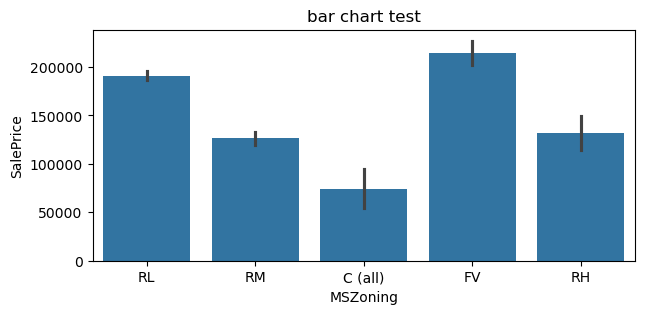

In [12]:
plt.figure(figsize = (7,3))
plt.title('bar chart test')
sns.barplot(x = raw_train['MSZoning'], y = raw_train['SalePrice'])
plt.show()

In [13]:
raw_train[['LotArea', 'SaleCondition']]

,LotArea,SaleCondition
0,8450,Normal
1,9600,Normal
2,11250,Normal
3,9550,Abnorml
4,14260,Normal
...,...,...
1455,7917,Normal
1456,13175,Normal
1457,9042,Normal
1458,9717,Normal


***HEATMAP***


<Axes: >

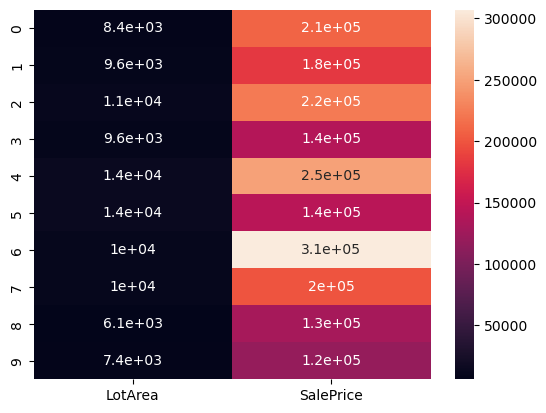

In [14]:
sns.heatmap(data = raw_train[['LotArea', 'SalePrice']].head(10), annot = True) 

***SCATTER PLOT***  
Biểu diễn mối quan hệ giữa 2 biến  
**hue** : color coding 

<Axes: xlabel='LotArea', ylabel='SalePrice'>

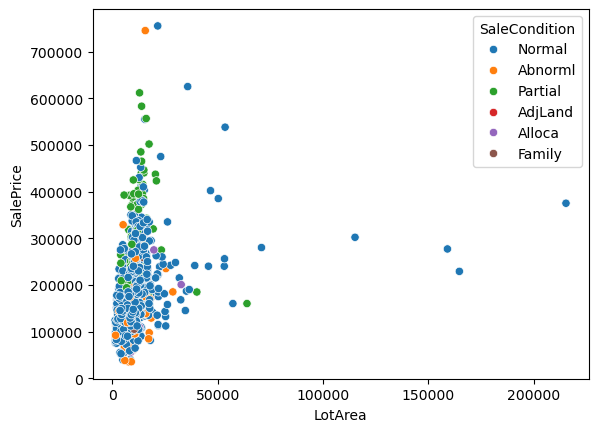

In [15]:
sns.scatterplot(x = raw_train['LotArea'], y = raw_train['SalePrice'], hue = raw_train['SaleCondition'])

**REGPLOT** : Scatterplot nhưng có thêm đường Regression, biểu diễn tương quan giữa 2 biến

Cách đọc Regline : Regline là hàm bậc nhất có 2 giá trị : *slope* và *value*  
Regline có slope(độ cong) càng ít thì tương quan giữa 2 giá trị càng bé, Regline hướng lên nghĩa là 2 giá trị có thể tỉ lệ thuận với nhau  
Giá trị của regline là vị trí của nó, biểu thị giá trị y(x) gần với thực tế nhất

<Axes: xlabel='LotArea', ylabel='SalePrice'>

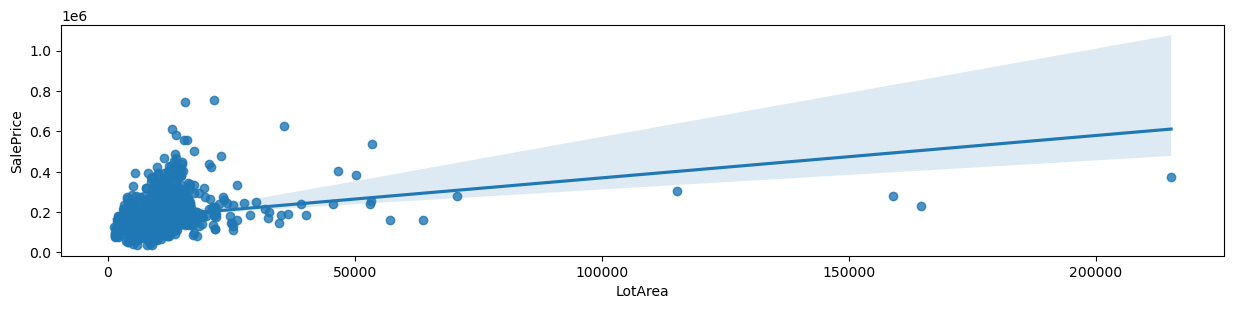

In [16]:
plt.figure(figsize=(15,3))
sns.regplot(x = 'LotArea', y = 'SalePrice', data = raw_train)
#từ biểu đồ nhìn ra lotarea càng lớn thì saleprice càng cao

**lmplot** : regression plot nhưng vẽ thêm regline theo sự khác biệt của 1 biến cụ thể

<Figure size 1500x1000 with 0 Axes>

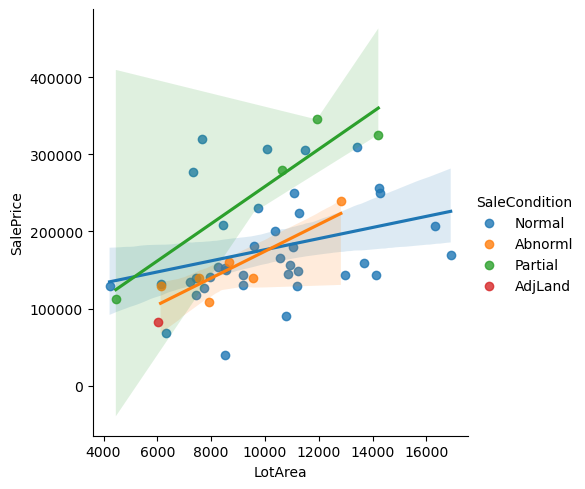

In [17]:
plt.close()
plt.figure(figsize=(15,10))
sns.lmplot(x = 'LotArea', y = 'SalePrice', hue = 'SaleCondition', data = raw_train.iloc[:50, :])
#Từ đồ thị nhìn ra được rằng các điều kiện bán hàng khác nhau sẽ có xu hướng giá bán khác nhau :  
#nhà bán được chủ yếu là normal, tuy nhiên giá bán lại thấp hơn partial cùng diện tích
# các nhà bán với điều kiện family có giá cao hơn

**histogram** : biểu đồ tần suất  
sns.histplot(data), y sẽ là tần suất xuất hiện với mỗi giá trị trong data

<Axes: xlabel='SaleCondition', ylabel='Count'>

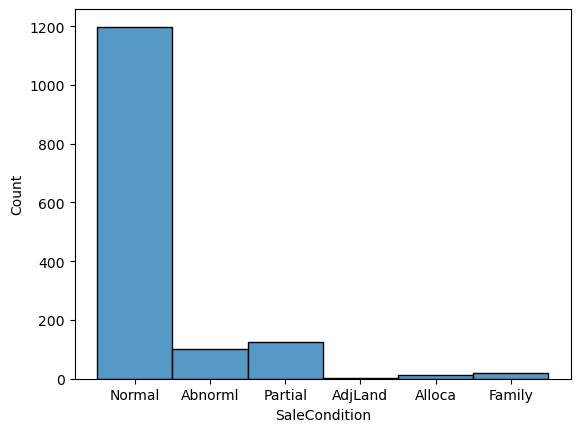

In [18]:
sns.histplot(raw_train['SaleCondition'])
# từ biểu đồ ta thấy được rằng phần rất lớn các nhà được bán với điều kiện bình thường (normal)

**KDE Plot - Density plot** : biểu đồ mật độ  
về cơ bản nó là histogram nhưng mượt và dễ diễn đạt hơn

C:\Users\MSI VN\AppData\Local\Temp\ipykernel_11412\372141009.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(raw_train['LotArea'], shade = True)


<Axes: xlabel='LotArea', ylabel='Density'>

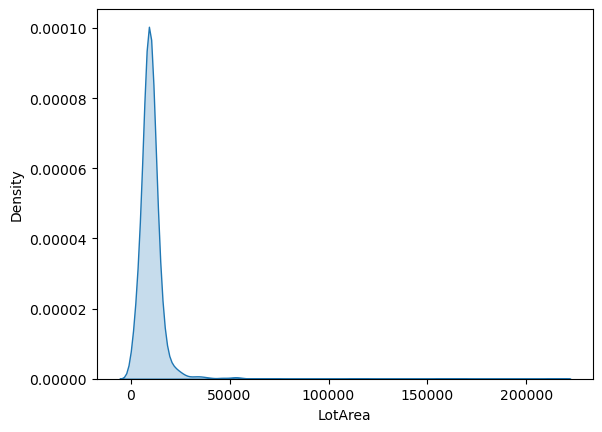

In [19]:
sns.kdeplot(raw_train['LotArea'], shade = True)
# Từ đồ thị, ta thấy mật độ tại 0-5000 cao nhất, tức là đa số các nhà có diện tích trong khoảng này
# Trong trường hợp có nhiều đỉnh, ta có thể suy ra rằng dữ liệu có thể được chia thành nhiều nhóm khác nhau 

<Axes: xlabel='YearBuilt', ylabel='Density'>

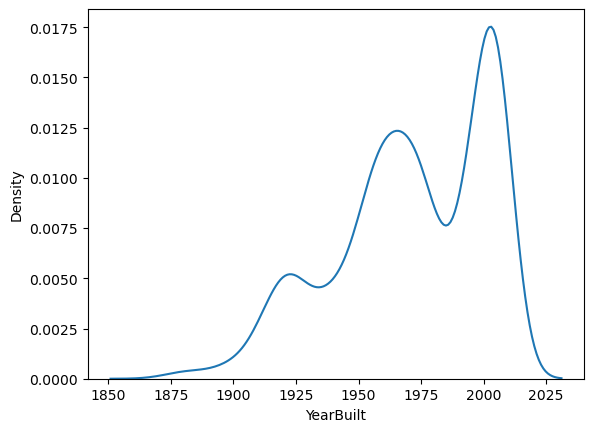

In [20]:
sns.kdeplot(raw_train.YearBuilt)
# Từ đồ thị, ta thấy rằng các năm 25, 65, 2000 là những năm có số lượng nhà đạt đỉnh trong thập kỉ đó

**Color-Coded Plot** : đặt hue vào histplot để so sánh

<Axes: xlabel='YearBuilt', ylabel='Count'>

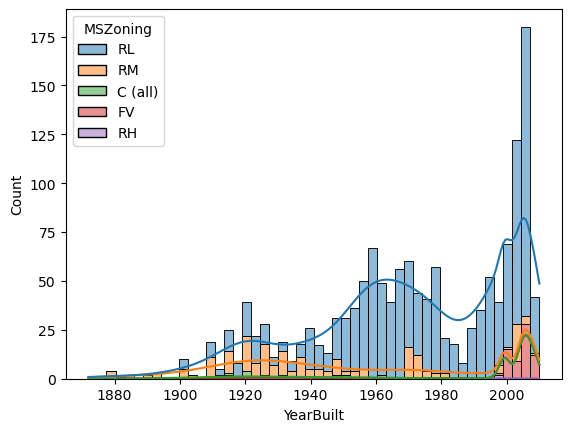

In [21]:
sns.histplot(x = 'YearBuilt', hue = 'MSZoning', data = raw_train, multiple = 'stack', kde = True, bins=50)
# multiple = 'stack' : các cột sẽ được chồng lên nhau
# bins = 50 : chia thành 50 cột, độ rộng cột sẽ nhỏ hơn